In [4]:
import os
from dotenv import load_dotenv
import requests
import pandas as pd
import matplotlib.pyplot as plt

load_dotenv()
key = os.getenv("API_KEY")
SERIE_DOLLAR = "DEXBZUS"

URL_SERIE_DOLLAR = f"https://api.stlouisfed.org/fred/series/observations?series_id={SERIE_DOLLAR}&api_key={key}&file_type=json"
resposta_dollar = requests.get(URL_SERIE_DOLLAR)
# resposta_dollar.status_code
df_dollar = pd.DataFrame(resposta_dollar.json()["observations"])

df_dollar = df_dollar.drop(columns=["realtime_start", "realtime_end"])

# converter a coluna date para datetime
df_dollar["date"] = pd.to_datetime(df_dollar["date"])

# substituindo os valores "." por NaN
df_dollar["value"] = df_dollar["value"].replace(".", float("NaN"))

# converter a coluna value para float
df_dollar["value"] = df_dollar["value"].astype(float)

# colocar a coluna date como index
df_dollar = df_dollar.set_index("date")
df_dollar

,value
date,
1995-01-02,0.8440
1995-01-03,0.8450
1995-01-04,0.8450
1995-01-05,0.8430
1995-01-06,0.8400
...,...
2023-10-09,NaN
2023-10-10,5.0668
2023-10-11,5.0501


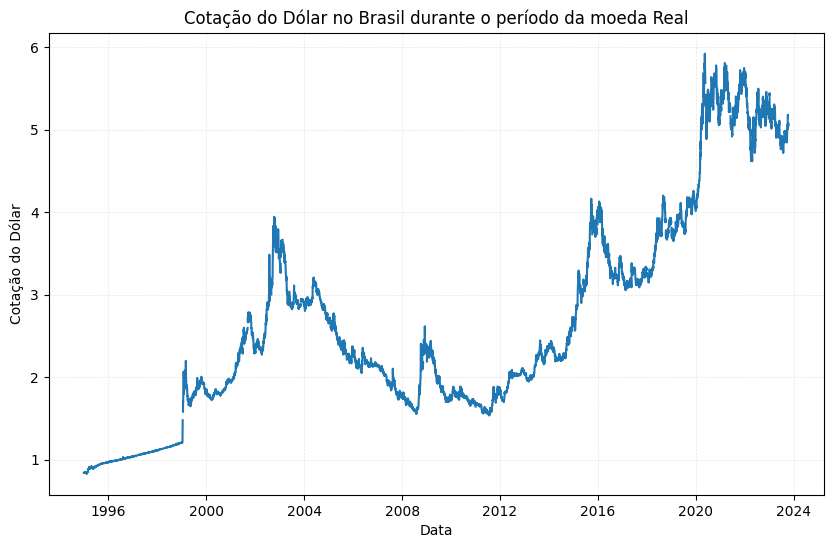

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))

# plotando o gráfico
ax.plot(df_dollar.index, df_dollar["value"])
ax.set_title("Cotação do Dólar no Brasil durante o período da moeda Real")
ax.set_ylabel("Cotação do Dólar")
ax.set_xlabel("Data")

ax.grid(linestyle="--", linewidth=0.5, color="black", alpha=0.1)

plt.show()


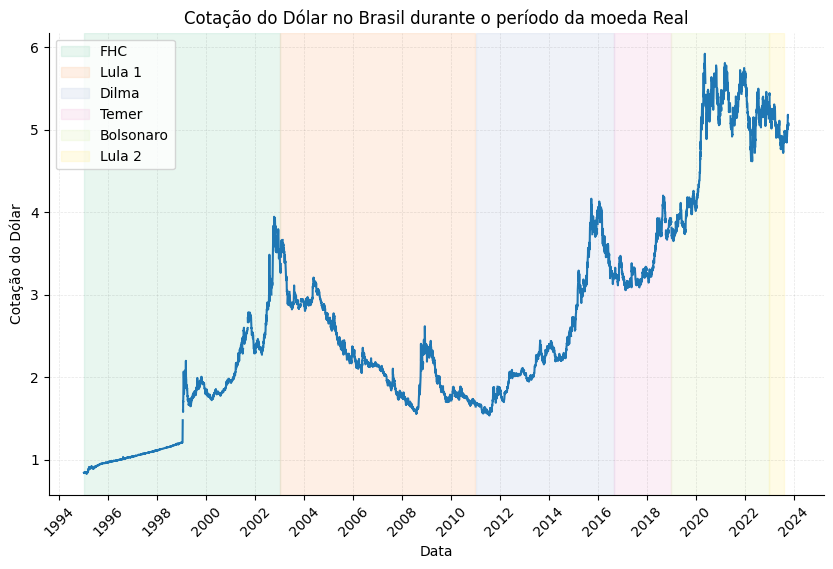

In [10]:
# pegando a última data do dataframe
ultima_data = df_dollar.index[-1]

# períodos dos presidentes
presidentes = {
    "FHC": ("1995-01-01", "2002-12-31"),
    "Lula 1": ("2003-01-01", "2010-12-31"),
    "Dilma": ("2011-01-01", "2016-08-31"),
    "Temer": ("2016-09-01", "2018-12-31"),
    "Bolsonaro": ("2019-01-01", "2022-12-31"),
    "Lula 2": ("2023-01-01", "2023-08-04"),
}

fig, ax = plt.subplots(figsize=(10, 6))

# plotando o gráfico
ax.plot(df_dollar.index, df_dollar["value"])
ax.set_title("Cotação do Dólar no Brasil durante o período da moeda Real")
ax.set_ylabel("Cotação do Dólar")
ax.set_xlabel("Data")

ax.grid(linestyle="--", linewidth=0.5, color="black", alpha=0.1)

# pegando as cores da paleta Pastel2 do Matplotlib
cores = plt.cm.Pastel2.colors

# criando com vspan os retângulos para cada presidente
for presidente, periodo, cor in zip(presidentes.keys(), presidentes.values(), cores):
    ax.axvspan(
        periodo[0],
        periodo[1],
        color=cor,
        alpha=0.3,
        label=presidente,
    )
    
# colocando os anos de 2 em 2 no eixo x com o ticker do matplotlib
from matplotlib.dates import YearLocator

ax.xaxis.set_major_locator(YearLocator(2))

# rotacionando os ticks do eixo x
ax.xaxis.set_tick_params(rotation=45)
    
ax.legend()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

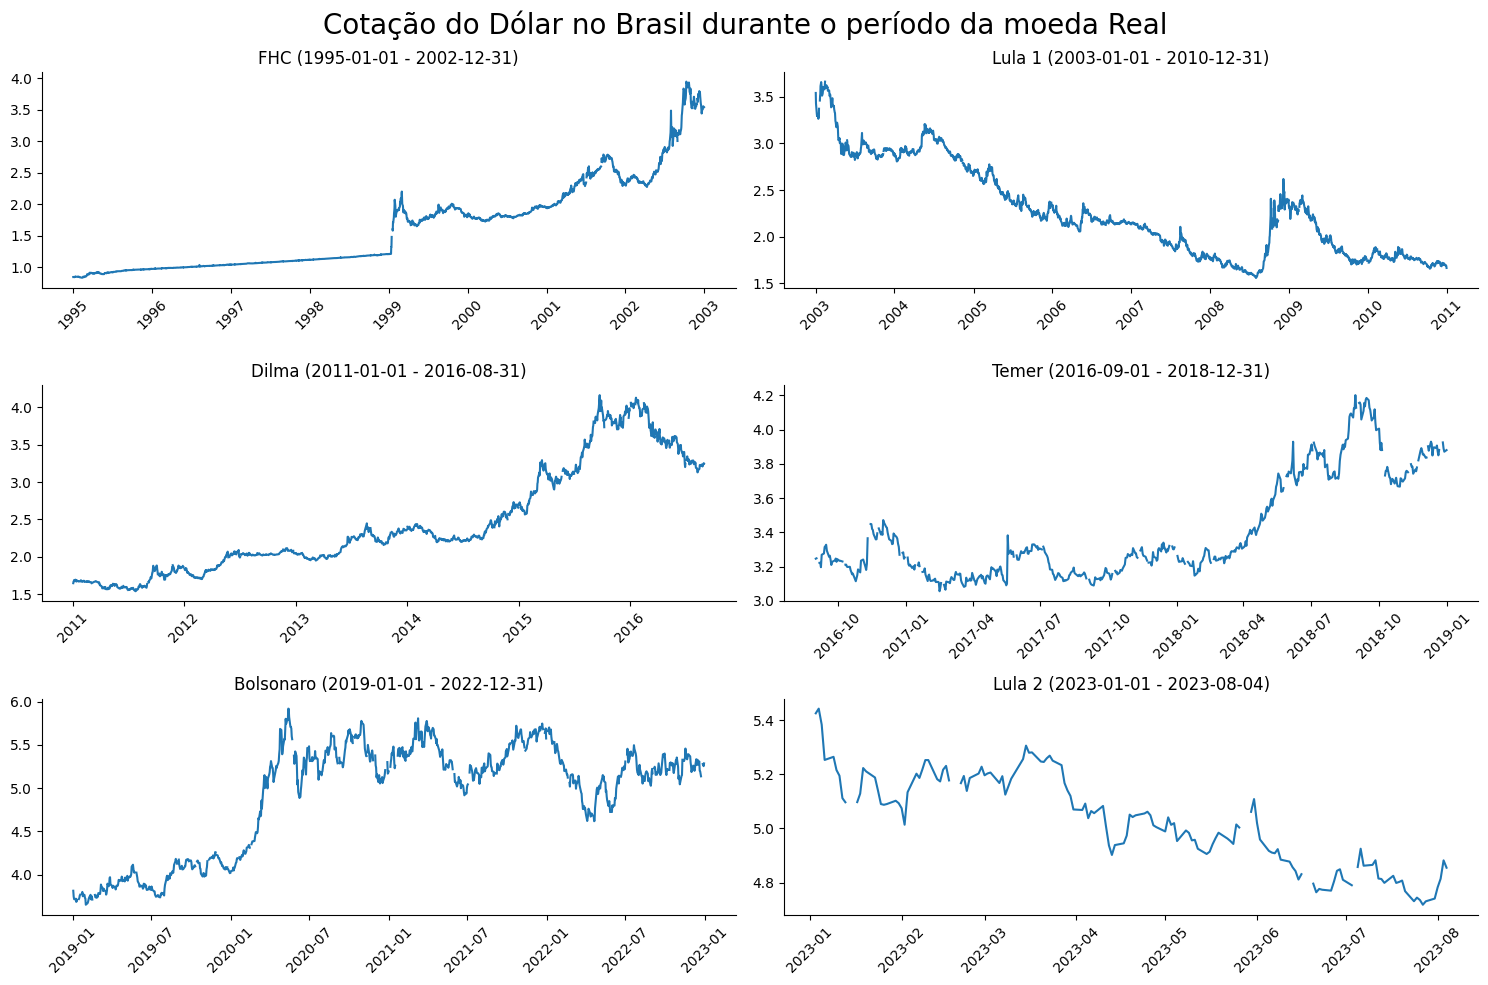

In [12]:
fig, axs = plt.subplots(3, 2, figsize=(15, 10), tight_layout=True)

# iterando sobre os presidentes e os subplots
for presidente, periodo, ax in zip(presidentes.keys(), presidentes.values(), axs.flat):
    df_temp = df_dollar.loc[presidentes[presidente][0] : presidentes[presidente][1]]
    ax.plot(df_temp.index, df_temp["value"])
    # rotacionando os ticks do eixo x
    ax.xaxis.set_tick_params(rotation=45)
    
    # colocando o título de cada subplot com o nome do presidente e o período
    ax.set_title(f"{presidente} ({periodo[0]} - {periodo[1]})")
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    

fig.suptitle("Cotação do Dólar no Brasil durante o período da moeda Real", fontsize=20)

plt.show()